# Task 5: Decision Trees and Random Forests

First, let's import the necessary libraries for data manipulation, visualization, and machine learning.

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next, we'll download the heart disease dataset using `kagglehub`.

In [111]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease-dataset


In [112]:
df = pd.read_csv(path+"/heart.csv")

Now, we'll load the dataset into a pandas DataFrame.

In [113]:
print(df.info())
print("shape of the data",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
shape of the data (1025, 14)


Let's check the information about the DataFrame, including data types and non-null counts, and display its shape.

In [114]:
#Checking for the null values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [115]:
#Inspecting the data statistical values
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [116]:
#checking the distribution of taget variable
df['target'].value_counts()

,count
target,
1,526
0,499


1 --> Heart Patient

0 --> Healthy Person


In [117]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Visualize the relationships between features and the target variable using a pairplot.

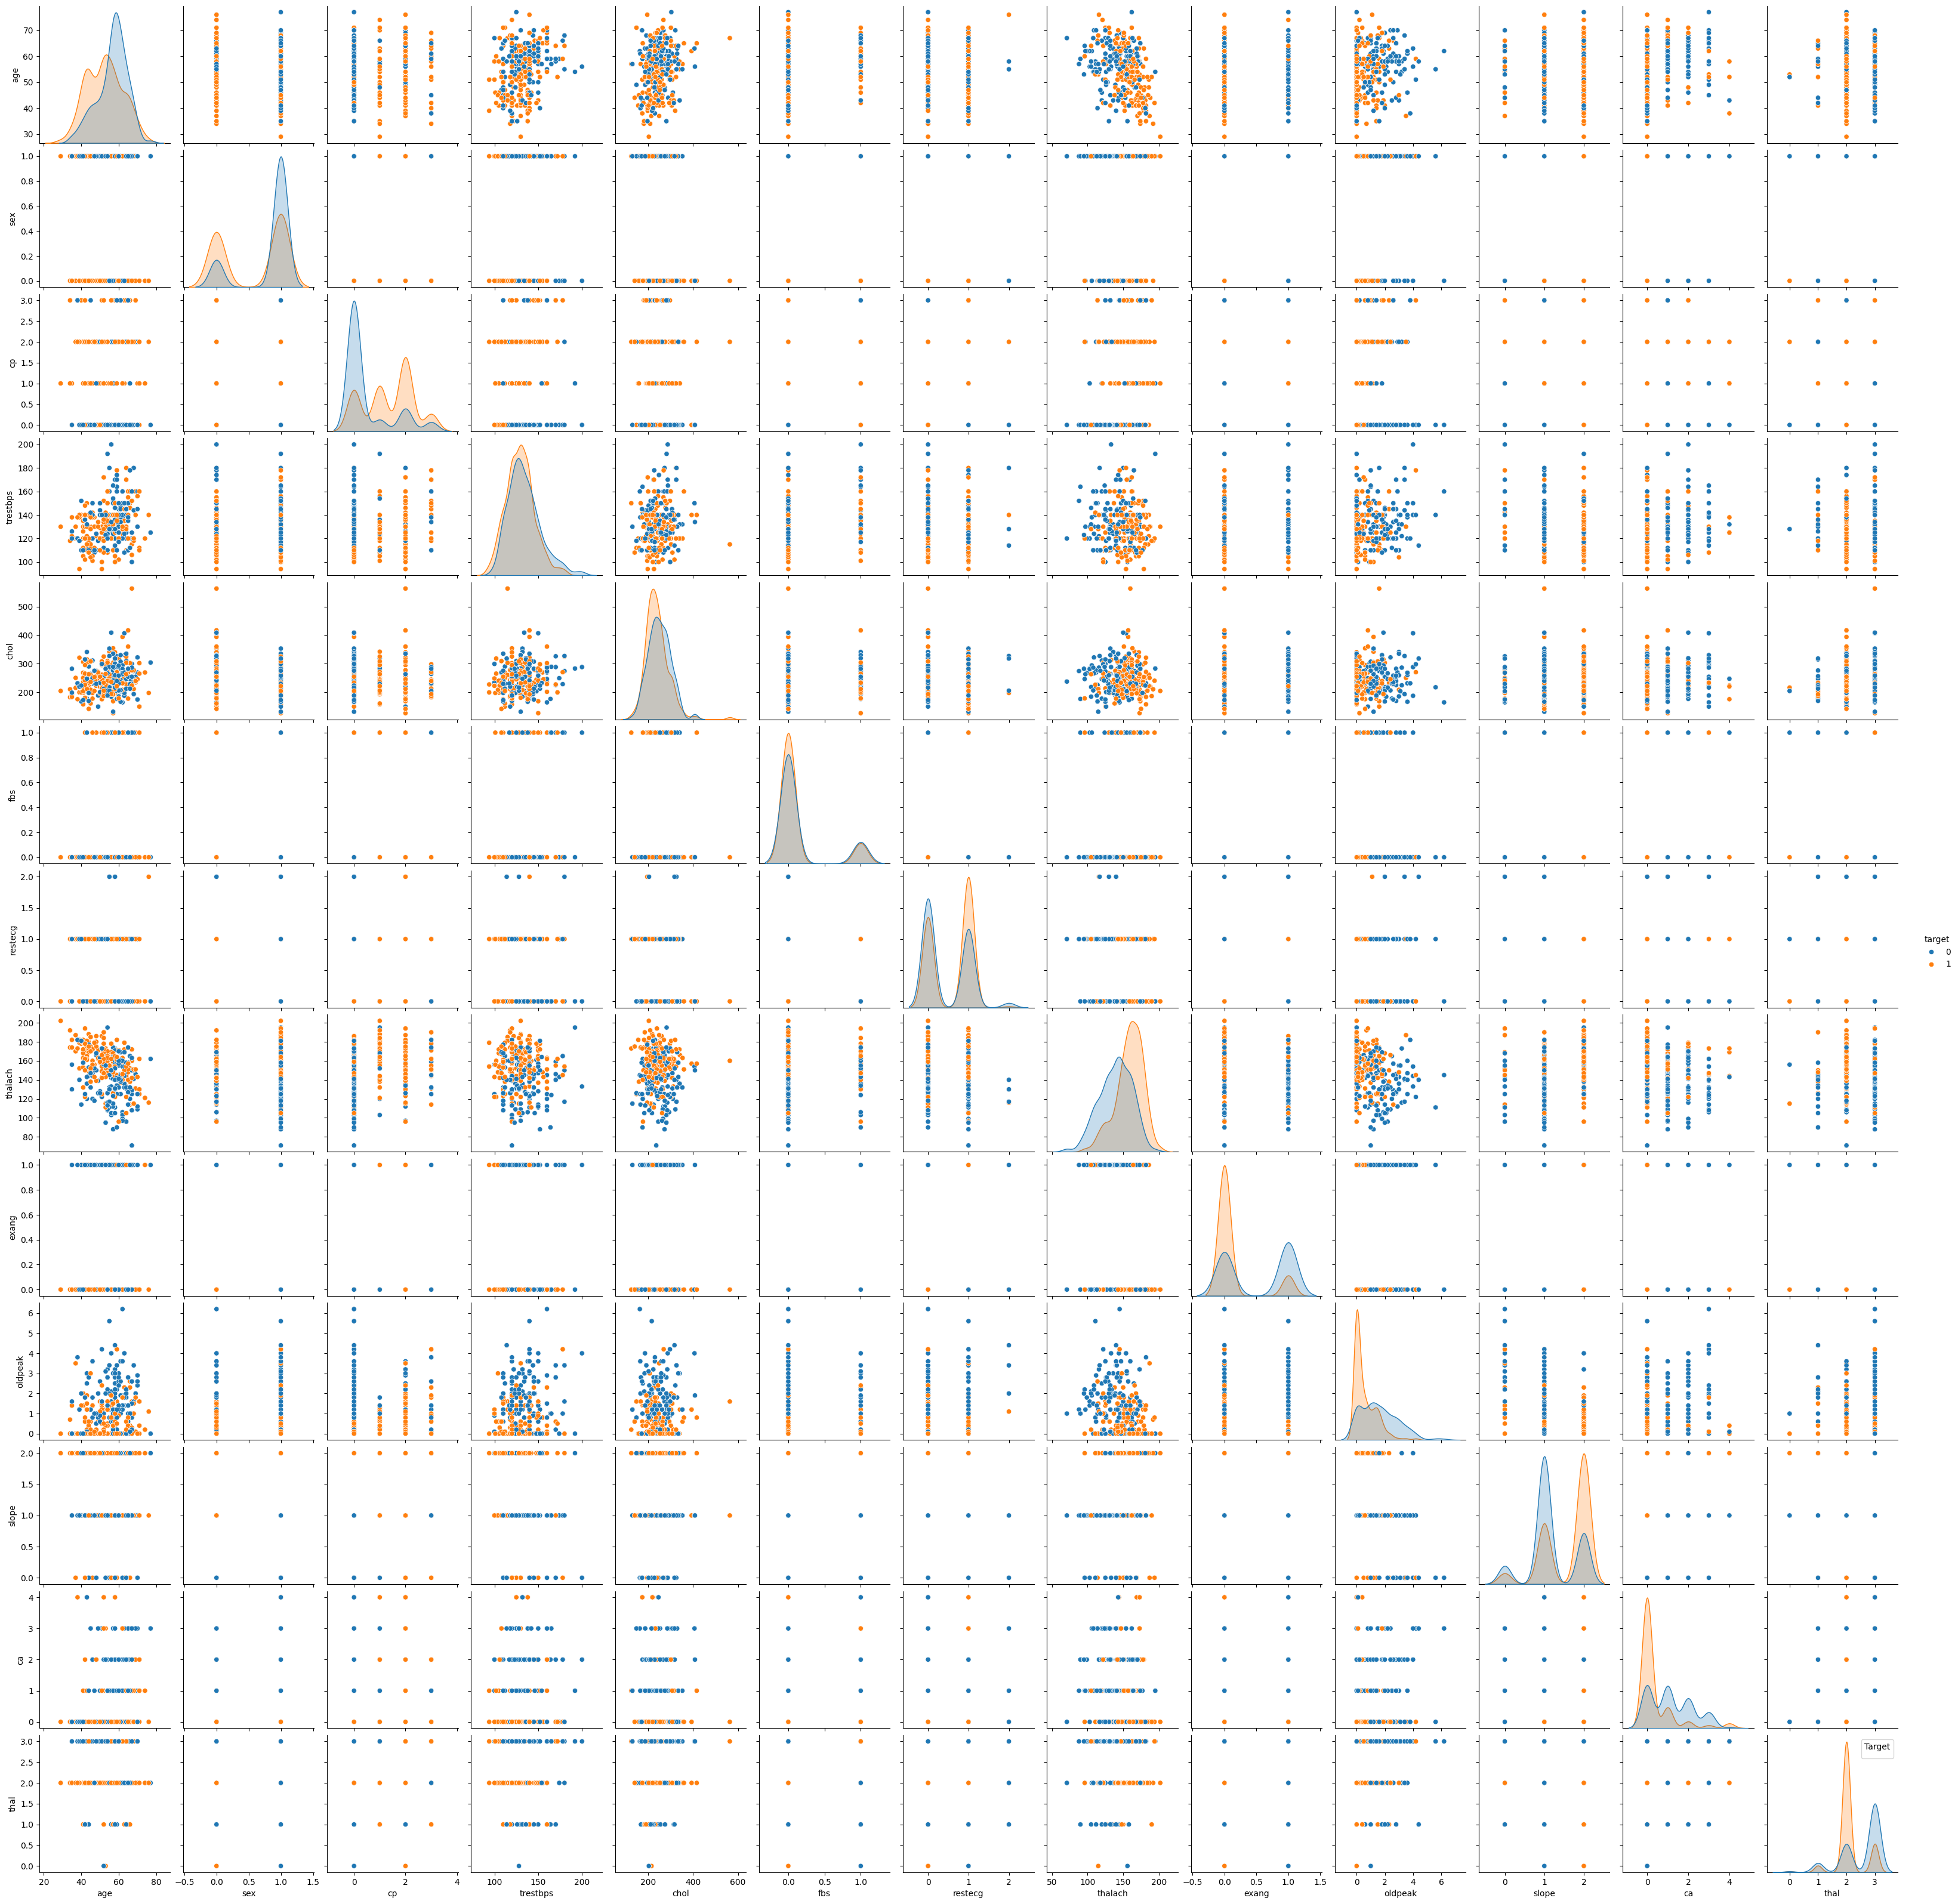

In [118]:
sns.pairplot(df,hue='target')
plt.legend(title='Target', loc='upper right')

<Axes: >

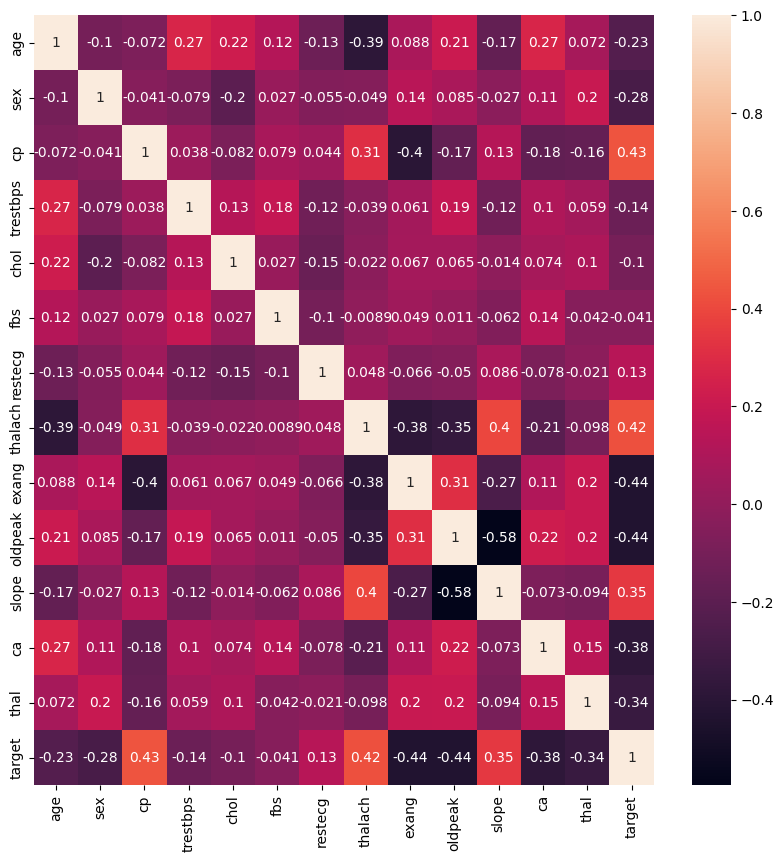

In [119]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Separate the features (X) and the target variable (Y).

In [120]:
X = df.drop(columns='target',axis=1)
Y = df['target']

Split the data into training and testing sets.

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

## Decision Tree Classifier model on the training data.

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

Evaluation of the Decision tree

In [123]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
accuracy_score(Y_test,pred)

0.9804878048780488

## Random Forest model on the training data.

In [126]:
from sklearn.ensemble import RandomForestClassifier
model_R = RandomForestClassifier()
model_R.fit(X_train,Y_train)

RandomForestClassifier()

In [127]:
random_pred = model_R.predict(X_test)
accuracy_score(Y_test,random_pred)


1.0

Let's perform cross-validation to get a more reliable estimate of the Random Forest model's performance.

In [128]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation (e.g., with 5 folds)
cv_scores = cross_val_score(model, X, Y, cv=5)

print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

Cross-validation accuracy scores: [0.9804878  0.98536585 1.         1.         1.        ]
Mean cross-validation accuracy: 0.9931707317073171


Accuracy of `Desicion Tree` : 98 %

Accuracy of `Random Forest` : 99 %



